In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

All_filename = "All.csv"  
df_all = pd.read_csv(All_filename)
Active_filename = "Active.csv"  
df_active = pd.read_csv(Active_filename)
Lazy_filename = "Lazy.csv"  
df_lazy = pd.read_csv(Lazy_filename)

# All

## Limpieza 1

In [2]:
df_all = df_all[df_all['Filename'] != 'CAMV100W.txt']
new_order = ['Filename',
             'Rest Mean','Rest Std',
             'Exercise Mean','Exercise Std',
             'Recovery Mean', 'Recovery Std',
             'Rest SD1', 'Rest SD2',
             'Exercise SD1','Exercise SD2',
             'Recovery SD1', 'Recovery SD2',
            ]  
df_all= df_all.reindex(columns=new_order)
#df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_all['carga'] = df_all['Filename'].str.extract(r'(\d+)')

cols = df_all.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_all= df_all[cols]

df_all

,Filename,carga,Rest Mean,Rest Std,Exercise Mean,Exercise Std,Recovery Mean,Recovery Std,Rest SD1,Rest SD2,Exercise SD1,Exercise SD2,Recovery SD1,Recovery SD2
0,hrrv100wD.txt,100,775.321149,49.318846,622.598753,24.365101,710.599526,54.438393,19.884154,66.812876,13.289446,31.804604,22.931997,73.520264
1,hrrv150wD.txt,150,880.489736,55.127078,657.493421,32.529406,791.543767,81.303204,27.946404,72.475058,17.763959,42.470314,38.228770,108.391939
2,hrrv200wD.txt,200,807.773585,48.884345,569.836502,25.347094,719.429257,74.891963,21.198706,65.724143,9.567952,34.567316,27.821784,102.272764
3,hrrv250wD.txt,250,822.875691,75.407134,540.288288,20.707133,758.587342,86.463744,30.912709,102.174187,10.106250,27.493486,30.523541,118.122605
4,hrrv300wD.txt,300,839.483146,77.580638,477.420382,9.563650,715.665072,70.410979,33.797283,104.383436,4.873274,12.625029,25.193996,96.456765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,ncb250wD.txt,250,690.822581,52.603625,392.288714,5.855711,584.323587,29.544900,16.615020,72.530843,1.938272,8.051182,6.186790,41.328664
207,VDMC200W.txt,200,864.687117,117.591970,461.122180,9.739372,668.382284,79.151051,75.287766,148.522598,3.659469,13.290441,30.663858,107.656992
208,VDCM100W.txt,100,643.366379,76.070233,541.261029,24.340603,701.953052,91.492875,32.161529,102.683235,9.366981,33.147731,42.341802,122.298641
209,VDCM150W.txt,150,811.278378,91.338431,546.451730,23.235547,737.224138,93.545998,59.606876,114.523135,9.217812,31.569218,41.530206,125.731038


## Checando

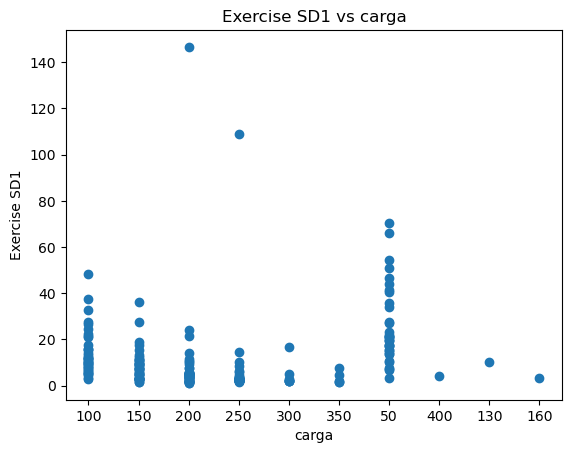

In [3]:
x_column = 'carga'
y_column = 'Exercise SD1'

plt.plot(df_all[x_column], df_all[y_column], marker='o',linestyle='')

plt.xlabel(x_column)  
plt.ylabel(y_column)  
plt.title(f'{y_column} vs {x_column}')

plt.show()

## Limpieza 2

In [4]:
values = ['400','130','160','300','350']

df_all = df_all[~df_all['carga'].isin(values)]
df_all['carga'] = df_all['carga'].astype(int)

df_all = df_all.sort_values(by='carga', ascending=True)

# Drop rows where `carga == 200` and `Exercise SD1 > 100`
df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD1'] > 100))]

# Drop rows where `carga == 250` and `Exercise SD1 > 100`
df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD1'] > 100))]

df_all

/tmp/ipykernel_28589/1453675455.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['carga'] = df_all['carga'].astype(int)


,Filename,carga,Rest Mean,Rest Std,Exercise Mean,Exercise Std,Recovery Mean,Recovery Std,Rest SD1,Rest SD2,Exercise SD1,Exercise SD2,Recovery SD1,Recovery SD2
34,VPS50W.txt,50,970.106796,93.833521,798.254335,68.725382,957.920128,86.876377,67.378896,113.794735,46.736387,85.000683,57.678222,108.686750
26,SFDP50W.txt,50,651.149675,60.050136,649.878525,29.718170,682.111872,65.934579,18.374309,82.945298,17.165752,38.383580,16.570182,91.831871
27,SFDP50Wtts.txt,50,652.154348,59.721856,649.264069,29.509841,681.954338,65.861399,18.432767,82.467694,17.072609,38.075335,16.661662,91.747523
155,yhr50wD.txt,50,826.619835,54.309731,806.456989,72.691614,836.711485,91.287696,22.993694,73.213396,35.563902,96.599449,33.107757,124.919824
53,SGFU50W.txt,50,859.631124,66.983218,709.459716,45.452616,829.656510,57.203709,34.606750,87.987367,21.738404,60.549846,28.162475,75.860978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,alg250wD.txt,250,718.155875,55.804834,381.759894,11.011166,521.274336,25.233160,19.365103,76.426689,1.865879,15.446783,5.365374,35.308330
169,bcli250wD.txt,250,817.670300,59.408508,423.400564,9.822274,663.491150,49.375860,25.646184,80.039301,2.429951,13.668692,10.887756,68.946505
18,AOG250Wtts.txt,250,990.036304,80.674275,479.523962,15.049553,899.012012,92.593204,50.248390,102.469917,3.000667,21.004449,47.370384,122.064557
43,HJZG250w.txt,250,695.777262,40.773229,446.774963,11.884380,636.008493,42.387505,23.997892,52.453452,2.207011,16.648266,14.898486,57.941709


## Checando 2

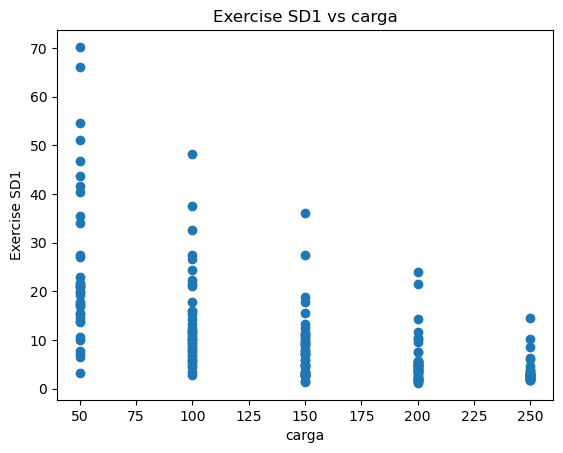

In [5]:
x_column = 'carga'
y_column = 'Exercise SD1'

plt.plot(df_all[x_column], df_all[y_column], marker='o',linestyle='')

plt.xlabel(x_column)  
plt.ylabel(y_column)  
plt.title(f'{y_column} vs {x_column}')

plt.show()

## SD2

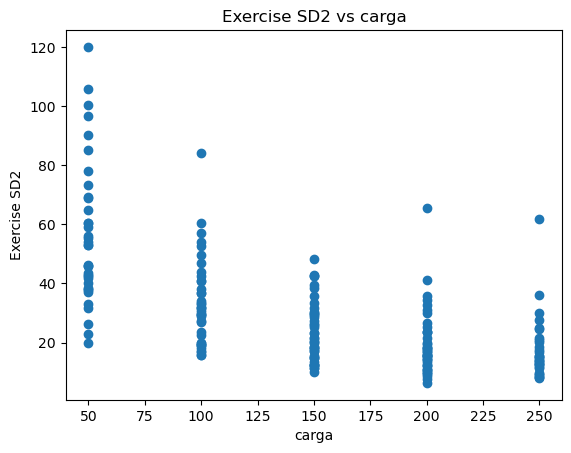

In [10]:
x_column = 'carga'
y_column = 'Exercise SD2'

plt.plot(df_all[x_column], df_all[y_column], marker='o',linestyle='')

plt.xlabel(x_column)  
plt.ylabel(y_column)  
plt.title(f'{y_column} vs {x_column}')

plt.show()

In [15]:
df_all = df_all[~((df_all['carga'] == 50) & (df_all['Exercise SD2'] > 110))]

df_all = df_all[~((df_all['carga'] == 100) & (df_all['Exercise SD2'] > 80))]

df_all = df_all[~((df_all['carga'] == 200) & (df_all['Exercise SD2'] > 60))]

df_all = df_all[~((df_all['carga'] == 250) & (df_all['Exercise SD2'] > 60))]


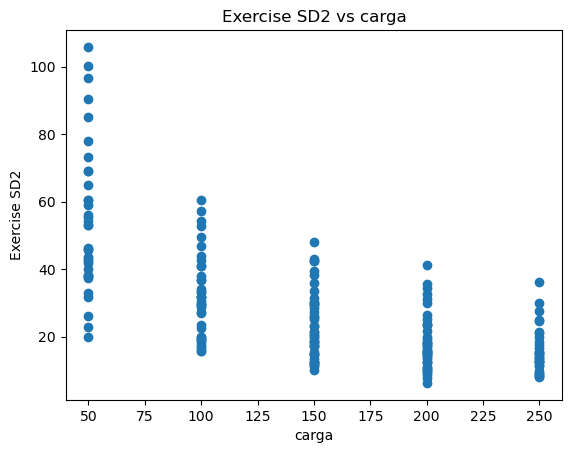

In [16]:
x_column = 'carga'
y_column = 'Exercise SD2'

plt.plot(df_all[x_column], df_all[y_column], marker='o',linestyle='')

plt.xlabel(x_column)  
plt.ylabel(y_column)  
plt.title(f'{y_column} vs {x_column}')

plt.show()

In [17]:
import matplotlib.pyplot as plt

def plotESDvsCarga_V2(df, x, y1, y2):
    # Ensure that the provided DataFrame contains the specified columns
    if x not in df.columns or y1 not in df.columns or y2 not in df.columns:
        print(f"Error: One or more columns '{x}', '{y1}', or '{y2}' are not in the DataFrame.")
        return
    
    # Create subplots for the two y-variables
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    
    # Plot for the first y-variable
    axs[0].plot(df[x], df[y1], marker='o', linestyle='', label='Data Points')
    
    # Calculate the promedio for each carga for y1
    promedios_y1 = df.groupby('carga')[y1].mean().to_dict()
    
    # Plot the promedio for each carga for y1
    for carga, promedio in promedios_y1.items():
        axs[0].plot(carga, promedio, marker='x', color='red', markersize=10, label=f'Promedio {carga}: {promedio:.2f}')
    
    axs[0].set_xlabel(x)  
    axs[0].set_ylabel(y1)  
    axs[0].set_title(f'{y1} vs {x}')
    axs[0].grid(True)  # Optional: Add grid for better readability
    axs[0].legend()
    
    # Plot for the second y-variable
    axs[1].plot(df[x], df[y2], marker='o', linestyle='', label='Data Points')
    
    # Calculate the promedio for each carga for y2
    promedios_y2 = df.groupby('carga')[y2].mean().to_dict()
    
    # Plot the promedio for each carga for y2
    for carga, promedio in promedios_y2.items():
        axs[1].plot(carga, promedio, marker='x', color='red', markersize=10, label=f'Promedio {carga}: {promedio:.2f}')
    
    axs[1].set_xlabel(x)  
    axs[1].set_ylabel(y2)  
    axs[1].set_title(f'{y2} vs {x}')
    axs[1].grid(True)  # Optional: Add grid for better readability
    axs[1].legend()
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage:
# plotESDvsCarga_V2(df_all, 'carga', 'Exercise SD1', 'Exercise SD2')


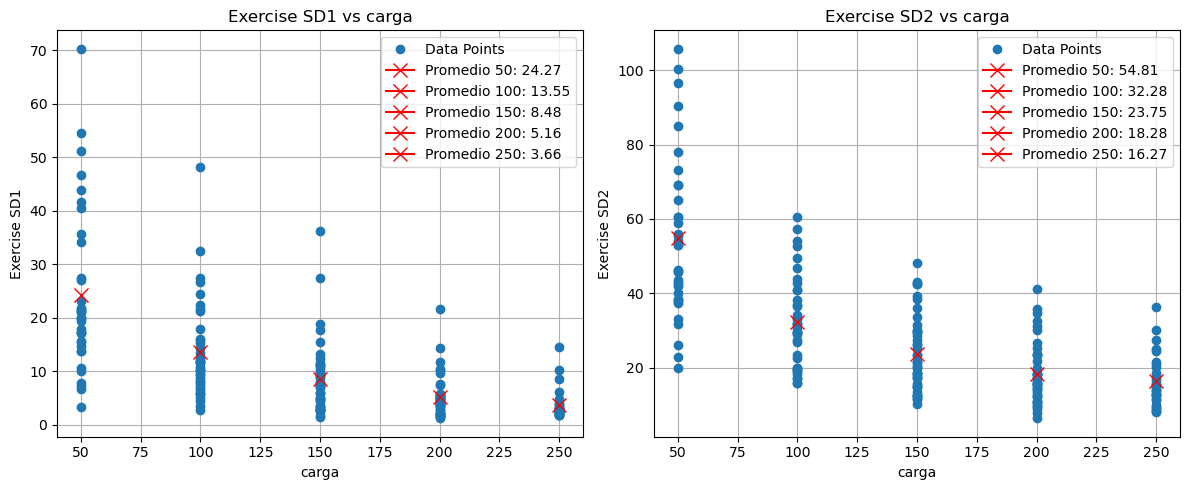

In [18]:
plotESDvsCarga_V2(df_all, 'carga', 'Exercise SD1', 'Exercise SD2')


## Plot y promedios

## Plot Versión 

In [8]:
def plotESDvsCarga_V2(df, x, y):
    # Ensure that the provided DataFrame contains the specified columns
    if x not in df.columns or y not in df.columns:
        print(f"Error: One or both columns '{x}' or '{y}' are not in the DataFrame.")
        return
    
    # Plot data from the DataFrame
    plt.plot(df[x], df[y], marker='o', linestyle='', label='Data Points')

    # Calculate the promedio for each carga and store in a dictionary
    promedios = df.groupby('carga')[y].mean().to_dict()
    
    # Plot the promedio for each carga without annotations
    for carga, promedio in promedios.items():
        plt.plot(carga, promedio, marker='x', color='red', markersize=10, label=f'Promedio {carga}: {promedio:.2f}')
    
    plt.xlabel(x)  
    plt.ylabel(y)  
    plt.title(f'{y} vs {x}')
    plt.grid(True)  # Optional: Add grid for better readability
    
    # Add a legend
    plt.legend()
    plt.show()


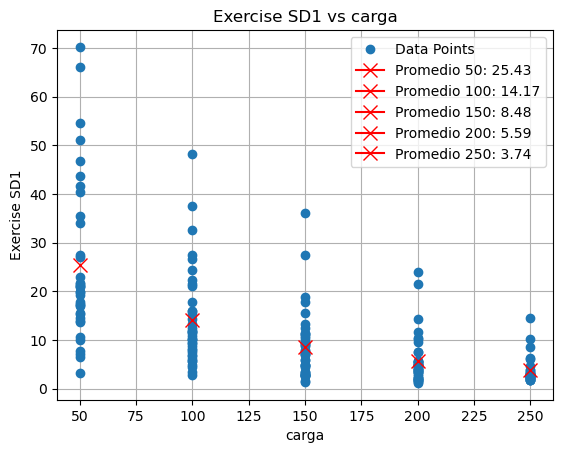

In [43]:
plotESDvsCarga(df_all, 'carga', 'Exercise SD1')


In [34]:
# Calculate the promedio for each unique carga and store in a dictionary
promedios = df_all.groupby('carga')['Exercise SD1'].mean().to_dict()

# The dictionary will look like: {'200': promedio_200, '250': promedio_250, ...}
print(promedios)


{50: 25.43490615637345, 100: 14.166625179978874, 150: 8.48222465514387, 200: 5.593935747245215, 250: 3.7439124263468804}


# Lazy

In [47]:
new_order = ['Filename',
             'Rest Mean','Rest Std',
             'Exercise Mean','Exercise Std',
             'Recovery Mean', 'Recovery Std',
             'Rest SD1', 'Rest SD2',
             'Exercise SD1','Exercise SD2',
             'Recovery SD1', 'Recovery SD2',
            ]  
df_lazy= df_lazy.reindex(columns=new_order)
#df_all_dropped = df_all.drop(df_all.columns[0], axis=1)
df_lazy['carga'] = df_lazy['Filename'].str.extract(r'(\d+)')

cols = df_lazy.columns.tolist()  # Get a list of column names
cols.insert(1, cols.pop(cols.index('carga')))  # Move 'carga' to the second position
# Apply the new order
df_lazy= df_lazy[cols]
df_lazy

,Filename,carga,Rest Mean,Rest Std,Exercise Mean,Exercise Std,Recovery Mean,Recovery Std,Rest SD1,Rest SD2,Exercise SD1,Exercise SD2,Recovery SD1,Recovery SD2
0,YARV50Wtts.txt,50,708.306604,60.228342,636.040340,35.401915,718.397129,65.380192,25.742175,81.277542,19.918104,45.938042,29.111174,87.734538
1,YARV100W.txt,100,648.653061,44.909784,543.876838,14.559131,690.960465,48.803506,15.063540,61.640560,7.604884,19.149406,22.797017,65.109631
2,YARV150W.txt,150,676.725000,38.940623,467.123924,10.583906,627.213508,28.871403,13.334150,53.477826,2.897829,14.687864,11.300433,39.279256
3,YARV200W.txt,200,607.449393,30.549099,387.621447,6.818436,555.467290,21.632840,10.815294,41.822764,1.357267,9.541790,6.649463,29.851814
4,CAMV50W.txt,50,643.359140,65.168186,588.374257,40.387976,631.640000,59.831015,25.835583,88.476684,21.187256,53.100795,28.331670,79.685788
5,CAMV100Wb.txt,100,681.374150,52.654637,557.928972,30.096148,670.674157,57.686634,20.208684,71.742624,11.846277,40.916502,21.084691,78.724366
6,CAMV150W.txt,150,615.025052,49.551679,488.767521,17.003488,551.460821,61.560024,18.926581,67.442114,5.877094,23.309057,16.434463,85.275994
7,CAMV200W.txt,200,627.742678,54.317395,412.871369,6.777540,547.331502,36.225358,16.999476,74.934506,1.598779,9.455155,13.402554,49.478530
8,jlm50wD.txt,50,755.025189,54.472135,633.523404,31.886409,759.703797,55.540254,18.187610,74.885720,13.760478,42.925377,18.074227,76.526812
9,jlm100wD.txt,100,755.138539,46.983340,564.566855,11.723620,739.285714,58.198379,23.812981,61.941305,4.922992,15.840433,16.148730,80.729960


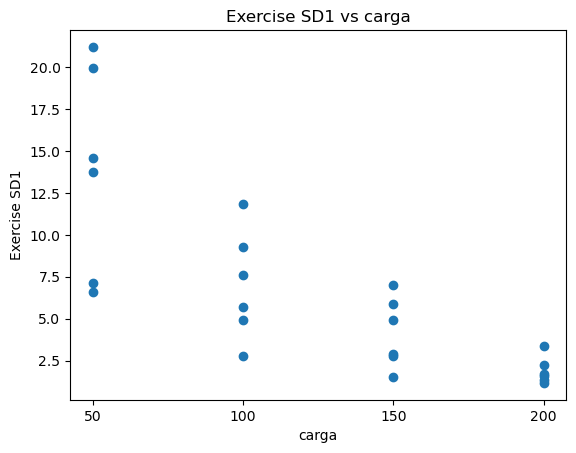

In [49]:

x_column = 'carga'
y_column = 'Exercise SD1'

plt.plot(df_lazy[x_column], df_lazy[y_column], marker='o',linestyle='')

plt.xlabel(x_column)  
plt.ylabel(y_column)  

plt.title(f'{y_column} vs {x_column}')
plt.show()

In [ ]:
plotESDvsCarga(lazy